In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data") 

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names, 
                      na_values = "?", comment='\t', 
                      sep=" ", skipinitialspace=True) 
dataset = raw_dataset.copy() 

In [4]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Model Year      392 non-null int64
Origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [8]:
origin = dataset.pop('Origin') 
# 根据origin列来写入新的3个列 
dataset['USA'] = (origin == 1)*1.0 
dataset['Europe'] = (origin == 2)*1.0 
dataset['Japan'] = (origin == 3)*1.0 
dataset.tail() # 查看新表格的后几项 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [9]:
# 切分为训练集和测试集 
train_dataset = dataset.sample(frac=0.8,random_state=0) 
test_dataset = dataset.drop(train_dataset.index)  

In [10]:
# 移动MPG油耗效能这一列为真实标签Y 
train_labels = train_dataset.pop('MPG') 
test_labels = test_dataset.pop('MPG') 

In [11]:
test_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0


In [12]:
# 查看训练集的输入X的统计数据 
train_stats = train_dataset.describe()
train_stats = train_stats.transpose() # 转置 
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [13]:
# 标准化数据 
def norm(x): # 减去每个字段的均值，并除以标准差
     return (x - train_stats['mean']) / train_stats['std'] 

In [14]:
normed_train_data = norm(train_dataset) # 标准化训练集 
normed_test_data = norm(test_dataset) # 标准化测试集 
print(normed_train_data.shape,train_labels.shape) 
print(normed_test_data.shape, test_labels.shape) 

(314, 9) (314,)
(78, 9) (78,)


In [15]:
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, 
train_labels.values)) # 构建Dataset对象 
train_db = train_db.shuffle(100).batch(32) # 随机打散，批量化 


In [16]:
import matplotlib.pyplot as plt

In [17]:
normed_train_data.shape

(314, 9)

In [18]:
train_dataset.shape

(314, 9)

In [19]:
train_dataset.iloc[:,0]

146    4
282    4
69     8
378    4
331    4
      ..
281    6
229    8
150    4
145    4
182    4
Name: Cylinders, Length: 314, dtype: int64

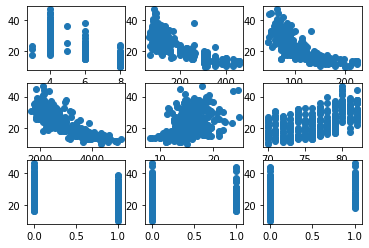

In [20]:
plt.figure(1)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.scatter(train_dataset.iloc[:,i],train_labels)    
plt.show()

In [21]:
class Network(keras.Model): 
    # 回归网络模型 
    def __init__(self): 
        super(Network, self).__init__() 
        # 创建3个全连接层 
        self.fc1 = keras.layers.Dense(64, activation='relu')
        self.fc2 = keras.layers.Dense(64, activation='relu') 
        self.fc3 = keras.layers.Dense(1) 
    def call(self, inputs, training=None, mask=None): 
        # 依次通过3个全连接层 
        x = self.fc1(inputs) 
        x = self.fc2(x) 
        x = self.fc3(x) 
        return x

In [22]:
model = Network() # 创建网络类实例 
# 通过build函数完成内部张量的创建，其中4为任意设置的batch数量，9为输入特征长度 
model.build(input_shape=(4, 9))  
model.summary() # 打印网络信息 

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  640       
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [23]:
optimizer = tf.keras.optimizers.RMSprop(0.001) # 创建优化器，指定学习率 

In [24]:
mae_losses = []
for epoch in range(200): # 200个Epoch 
    for step, (x,y) in enumerate(train_db): # 遍历一次训练集 
        # 梯度记录器，训练时需要使用它 
        with tf.GradientTape() as tape: 
            out = model(x) # 通过网络获得输出 
            loss = tf.reduce_mean(keras.losses.MSE(y, out)) # 计算MSE 
            mae_loss = tf.reduce_mean(keras.losses.MAE(y, out)) # 计算MAE 
 
        if step % 10 == 0: # 间隔性地打印训练误差 
            print(epoch, step, float(loss),float(mae_loss)) 
            mae_losses.append(mae_loss)
        # 计算梯度，并更新 
        grads = tape.gradient(loss, model.trainable_variables) 
        optimizer.apply_gradients(zip(grads, model.trainable_variables)) 


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

0 0 620.134521484375 23.70013999938965
1 0 593.453857421875 23.107704162597656
2 0 396.09295654296875 18.557098388671875
3 0 333.2088623046875 16.78677749633789
4 0 294.9395446777344 14.945621490478516
5 0 192.70411682128906 11.607711791992188
6 0 123.24775695800781 8.818673133850098
7 0 140.95700073242188 9.394033432006836
8 0 106.37715911865234 8.33888053894043
9 0 102.22006225585938 8.098711013793945
10 0 90.3251953125 7.454796314239502
11 0 70.55398559570312 6.762439250946045
12 0 58.32170104980469 

182 0 50.14497375488281 5.682949542999268
183 0 76.19770812988281 6.890491485595703
184 0 71.5882568359375 6.743056297302246
185 0 73.2713623046875 6.93351411819458
186 0 54.46733856201172 6.179089546203613
187 0 67.85911560058594 6.547426223754883
188 0 65.31854248046875 6.217127323150635
189 0 46.322784423828125 5.65518856048584
190 0 57.29841232299805 6.336357116699219
191 0 52.701683044433594 5.811647415161133
192 0 83.35649108886719 7.697597503662109
193 0 51.329368591308594 5.717994689941406
194 0 44.297264099121094 5.730686187744141
195 0 73.54469299316406 7.061705589294434
196 0 59.18736267089844 6.4741597175598145
197 0 46.94355010986328 6.0134382247924805
198 0 61.657413482666016 6.498683452606201
199 0 72.77740478515625 6.961414337158203


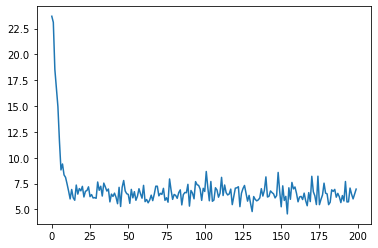

In [27]:
plt.plot(range(len(mae_losses)),mae_losses)
plt.show()